In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import keras
import cv2 as cv

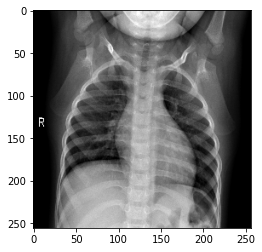

In [200]:

test = r"C:\Users\MSI Gaming PC\Desktop\chest_xray\Chest_xray\test"
train = r"C:\Users\MSI Gaming PC\Desktop\chest_xray\Chest_xray\train"
val = r"C:\Users\MSI Gaming PC\Desktop\chest_xray\Chest_xray\val"
#Normal = r"C:\Users\MSI Gaming PC\Desktop\chest_xray\Chest_xray\train\NORMAL"
#Pneomonia = r"C:\Users\MSI Gaming PC\Desktop\chest_xray\Chest_xray\train\PNEUMONIA"

#Pneomonia  = cv.imread(r"C:\Users\MSI Gaming PC\Desktop\chest_xray\Chest_xray\train\PNEUMONIA")
#Pneomonia_patches = patchify(Pneomonia,(64,64),step=64)
#plt.imshow(img_patches.shape)
#Trying to see how loading images work and preprocessing
image = cv.imread(r"C:\Users\MSI Gaming PC\Desktop\chest_xray\Chest_xray\train\NORMAL\IM-0239-0001.jpeg")

image = cv.resize(image,(256,256))
plt.imshow(image)

In [201]:
#Directory functions using keras to resize the image and creating batch size.
#Changing colour to gray to reduce processing time as data is already in gray


test_ds = tf.keras.utils.image_dataset_from_directory(
  test,
  color_mode="grayscale",
  label_mode="binary",
  seed=123,
  image_size=(256, 256),
  batch_size=32
)

train_ds = tf.keras.utils.image_dataset_from_directory(
  train,
  color_mode="grayscale",
  label_mode="binary",
  seed=123,
  image_size=(256, 256),
  batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  val,
  color_mode="grayscale",
  label_mode="binary",
  seed=123,
  image_size=(256, 256),
  batch_size=32
)

Found 624 files belonging to 2 classes.
Found 4536 files belonging to 2 classes.
Found 621 files belonging to 2 classes.


In [202]:
#Making the model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='ReLU', input_shape=(256, 256, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='ReLU'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='ReLU'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#Compiling 
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.BinaryCrossentropy(),
  metrics=['accuracy']
)

# Training 
# call back function if the accuracy does not increase after 3 epochsthe programme is stopped
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20,
  callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)]
)






Epoch 1/20
142/142 [==============================] - 8s 53ms/step - loss: 23.5632 - accuracy: 0.7105 - val_loss: 0.6784 - val_accuracy: 0.6618
Epoch 2/20
142/142 [==============================] - 7s 51ms/step - loss: 0.6539 - accuracy: 0.7654 - val_loss: 0.6635 - val_accuracy: 0.6618
Epoch 3/20
142/142 [==============================] - 8s 54ms/step - loss: 0.6290 - accuracy: 0.7654 - val_loss: 0.6529 - val_accuracy: 0.6618
Epoch 4/20
142/142 [==============================] - 8s 51ms/step - loss: 0.6089 - accuracy: 0.7654 - val_loss: 0.6459 - val_accuracy: 0.6618
Epoch 5/20
142/142 [==============================] - 8s 53ms/step - loss: 0.5930 - accuracy: 0.7654 - val_loss: 0.6419 - val_accuracy: 0.6618
Epoch 6/20
142/142 [==============================] - 8s 52ms/step - loss: 0.5806 - accuracy: 0.7654 - val_loss: 0.6401 - val_accuracy: 0.6618
Epoch 7/20
142/142 [==============================] - 7s 50ms/step - loss: 0.5711 - accuracy: 0.7654 - val_loss: 0.6399 - val_accuracy: 0.661

In [195]:
#Prediction
predictions = model.predict(test_ds)


20/20 [==============================] - 1s 35ms/step


In [196]:
# Prediction to normal or pneomonia
print(predictions)

[[1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9999988e-01]
 [2.2266256e-02]
 [8.8823289e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9999988e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9907565e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.6104677e-03]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.7173417e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [7.2984090e-05]
 [7.1461051e-05]
 [9.9333656e-01]
 [1.0000000e+00]
 [3.9496854e-06]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [3.6126665e-05]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [4.9995090e-04]
 [4.5099384e-01]
 [1.0000000e+0

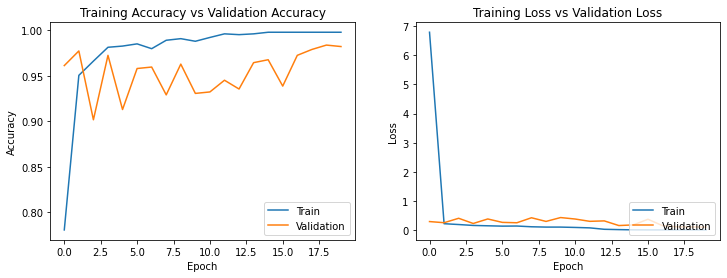

In [197]:
# graph out the loss accuracy and accuracy  

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12, 4)

ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_title("Training Accuracy vs Validation Accuracy")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epoch")
ax1.legend(["Train", "Validation"], loc="lower right")

ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_title("Training Loss vs Validation Loss")
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epoch")
ax2.legend(["Train", "Validation"], loc="lower right")

1/1 [==============================] - 0s 211ms/step
0


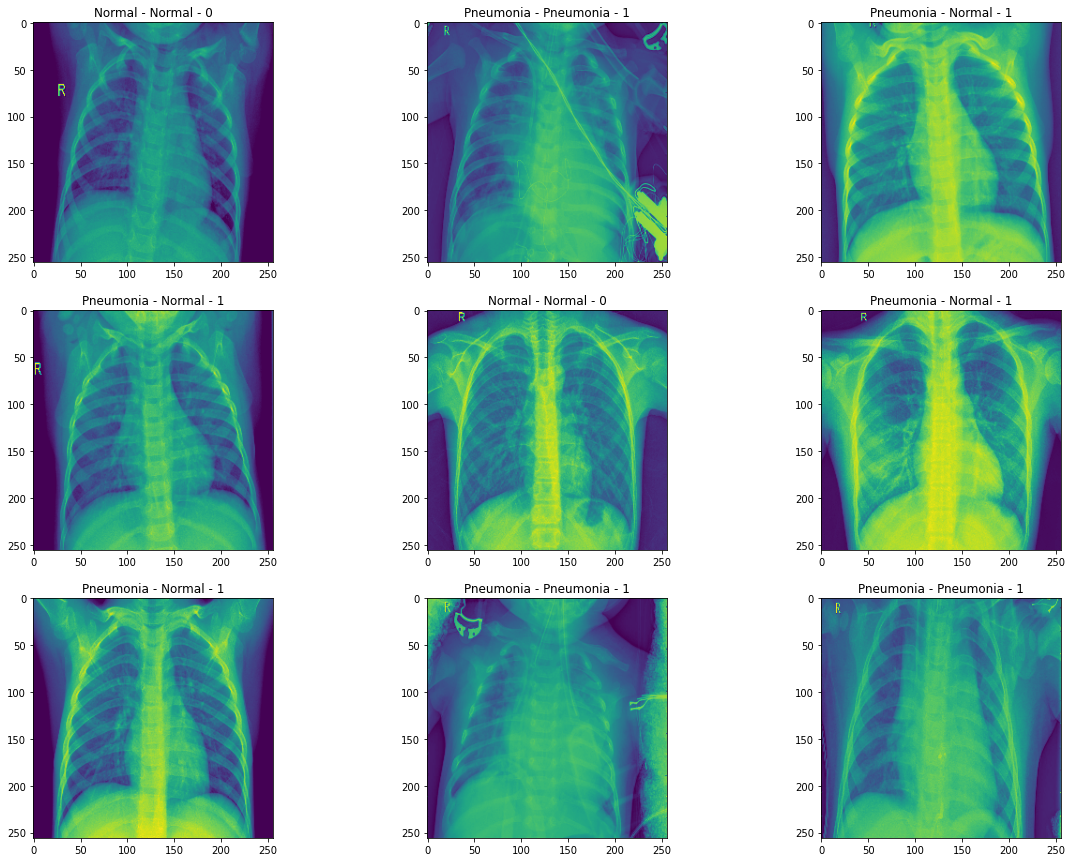

In [198]:
# 3,3 with prediction on the right 
#the actual title in middle 
#prediction accuracy rounded on the right

predict = test_ds.take(1)
prediction = model.predict(predict)
classes = ["Normal","Pneumonia"]



for images,labels in predict:
    fig, ax =plt.subplots(3,3,figsize=(20,15))
    ax = ax.ravel()
    labels = np.array(labels)
    print(int(labels[0]))
    for i in range(9):
        ax[i].imshow(images[i])
        ax[i].set_title(classes[round(prediction[i,0])]+" - "+classes[int(labels[i])]+" - "+str(round(prediction[i,0])))
        
        
    
